# Annotate Changi Data

In [2]:
import os
os.environ['JAX_PLATFORM_NAME'] = 'cpu'
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scripts.io import read_image, KEY_INPUT_EO, KEY_INPUT_SAR, KEY_OUTPUT_SAR
from scripts.utils import c2ap, T, invT, standardize, clip
from skimage import exposure

In [5]:
baseline_directory = '../methods/'
METHOD_LIST = ['tbog', 'aef']

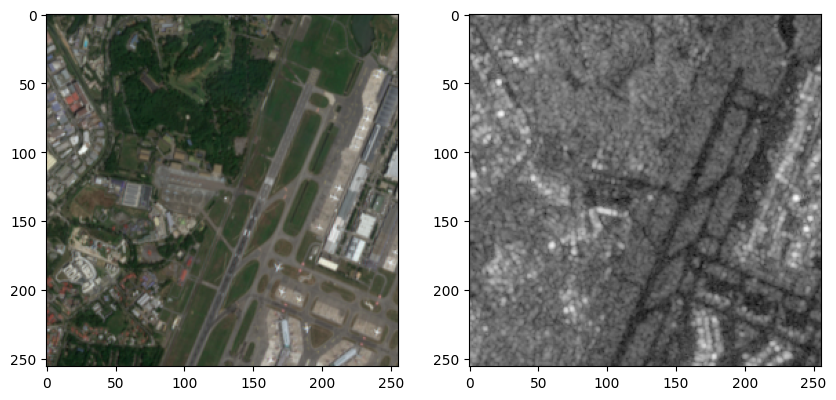

In [6]:
input_path = "../../dataset/data_changi.npz"

sar = read_image(input_path, key=KEY_INPUT_SAR).squeeze()
eo = read_image(input_path, key=KEY_INPUT_EO)
eo = exposure.adjust_gamma(eo, gamma=0.6, gain=1.0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo)
plt.subplot(1, 2, 2)
plt.imshow(sar, cmap='gray')

# plt.imsave(input_path.replace('data_', 'eo_').replace('.npz', '.png'), eo) 
# plt.imsave(input_path.replace('data_', 'sar_').replace('.npz', '.png'), sar, cmap='gray') 

In [96]:
def add_annotation(img):
    font = cv2.FONT_HERSHEY_DUPLEX
    lw = 1

    img_annotated = img.copy()

    cv2.putText(img_annotated, "Plane", (168 - 10, 185 - 10 - 5), font, 0.5, (255, 0, 0), lw-1, cv2.LINE_AA)
    cv2.circle(img_annotated, (168, 185), 10, (255, 0, 0), lw)  # Plane

    cv2.putText(img_annotated, "Urban", (10, 20), font, 0.5, (255, 0, 0), lw-1, cv2.LINE_AA)
    rect = ((0, 75), (100, 75), 55)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.polylines(img_annotated, [box], True, (255, 0, 0), lw)

    cv2.putText(img_annotated, "Plane park", (80, 132-25), font, 0.5, (255, 0, 0), lw-1, cv2.LINE_AA)
    rect = ((105, 132), (50, 35), 10)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.polylines(img_annotated, [box], True, (255, 0, 0), lw)

    return img_annotated

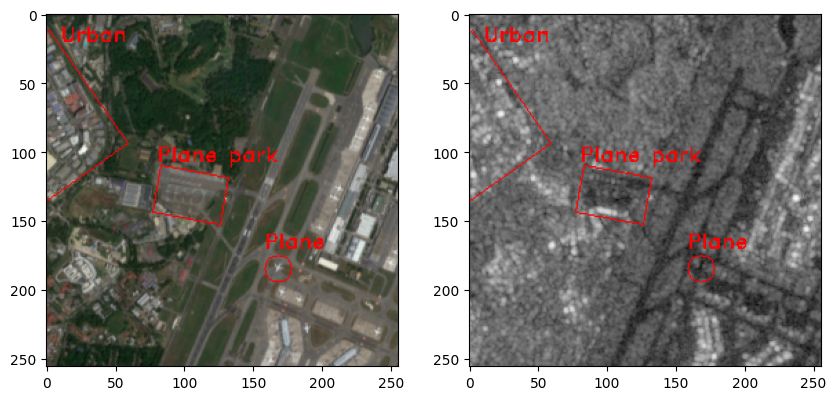

In [ ]:
eo_annotated = add_annotation(eo * 255.).clip(0, 255).astype(np.uint8)
sar_annotated = add_annotation(np.dstack([sar * 255.] * 3)).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo_annotated)
plt.subplot(1, 2, 2)
plt.imshow(sar_annotated)

# plt.imsave(Path.home() / 'Downloads' / 'eo_changi_annotated.png', eo_annotated, dpi=300) 
# plt.imsave(Path.home() / 'Downloads' / 'sar_changi_annotated.png', sar_annotated, dpi=300) 